# LDA, QDA and LR analysis

In this project I use two databases (urine.csv and iris.csv) to conduct Linear Discriminant, Quadratic Discriminant and Linear Regresion analysis.

Urine.csv head
    id  r  gravity    ph  osmo  cond  urea  calc
0   1  0    1.021  4.91   725  20.9   443  2.45
1   2  0    1.017  5.74   577  20.0   296  4.49
2   3  0    1.008  7.20   321  14.9   101  2.36
3   4  0    1.011  5.51   408  12.6   224  2.15
4   5  0    1.005  6.52   187   7.5    91  1.16

Accuracy: 0.8354430379746836
Precision: 0.9565217391304348
Recall: 0.6470588235294118
F1: 0.7719298245614036 

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87        45
         1.0       0.96      0.65      0.77        34

    accuracy                           0.84        79
   macro avg       0.87      0.81      0.82        79
weighted avg       0.86      0.84      0.83        79


Confusion matrix


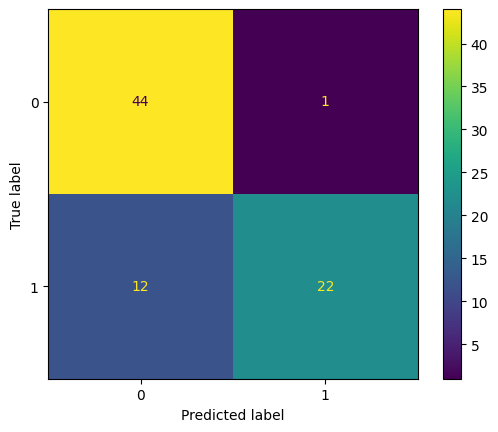

In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

plt.close('all')
df = pd.read_csv("urine.csv")
print("Urine.csv head\n", df.head())

X = df.values[:, 2:]
y = df.values[:, 1]

#	Classification algorithm QDA
da = QuadraticDiscriminantAnalysis()
da.fit(X, y)
y_pred = da.predict(X) # prediction of the value of the dependent variable

#	Calculating model evaluation factors
print('\nAccuracy:', accuracy_score(y, y_pred))
print('Precision:', precision_score(y, y_pred))
print('Recall:', recall_score(y, y_pred))
print('F1:', f1_score(y, y_pred), '\n')

#	Model evaluation report
labels = np.unique(y)
print(classification_report(y, y_pred, labels=labels))

#	Computing confusion matrix

print('\nConfusion matrix')

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


iris.csv head
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
LR Accuracy (test): 0.9666666666666667
QDA Accuracy (test): 0.9666666666666667
Accuracy (train): 0.9583333333333334
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



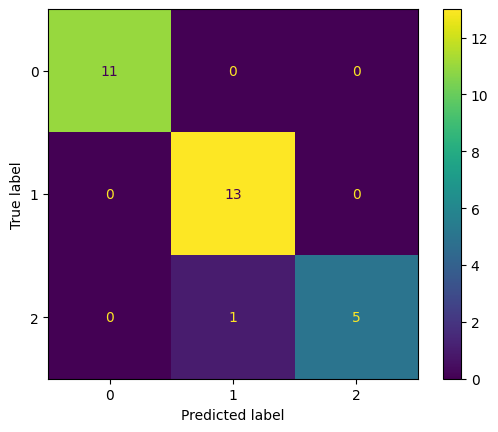

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print("iris.csv head\n", df.head())

X = df.values[:, 0:3]
y = df.values[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=0.001, max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('LR Accuracy (test):', accuracy_score(y_test, y_pred))

da = QuadraticDiscriminantAnalysis()
da.fit(X_train, y_train)

y_pred = da.predict(X_test)

print('QDA Accuracy (test):', accuracy_score(y_test, y_pred))

y_train_pred = da.predict(X_train)

print('Accuracy (train):', accuracy_score(y_train, y_train_pred))


labels = np.unique(y)

print(classification_report(y_test, y_pred, labels=labels))

labels = np.unique(y)

cm = confusion_matrix(y_test, y_pred)

#print(pd.DataFrame(cm, index=labels, columns=labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

X = df.values[:, 0:3]
y = df.values[:, 4]

da = QuadraticDiscriminantAnalysis()

print('Cross-validation')
scores = cross_val_score(da, X, y, cv=5)

print('Accuracy: ',scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())

Cross-validation
Accuracy:  [1.         1.         0.9        0.93333333 0.96666667]
Accuracy (mean):  0.96
Accuracy (std):  0.038873012632301994
